## Import

In [2]:
from bt import Backtest, Strategy
import pandas as pd

/Users/justinleng/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Data Query

In [3]:
data = {
    'Date': ['2023-09-01', '2023-09-02', '2023-09-03', '2023-09-04', '2023-09-05'],
    'Open': [150.0, 151.2, 153.5, 152.8, 152.0],
    'High': [152.3, 153.8, 155.0, 154.2, 153.5],
    'Low': [149.5, 150.7, 152.0, 151.5, 151.2],
    'Close': [151.5, 153.0, 154.5, 153.2, 152.8],
    'Volume': [100000, 120000, 95000, 110000, 105000]
}

# 1a) Create a DataFrame
df = pd.DataFrame(data)

# 1b) Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index("Date")

## Strategy Creation

In [4]:
class CrossOver(Strategy):
    n1 = 10
    n2 = 20
    ema_period = 5
    rsi_period = 5
    upper_bound = 55
    lower_bound = 10
    

    def init(self):
        close = self.data.Close
        # self.sma1 = self.I(SMA, close, self.n1)
        # self.sma2 = self.I(SMA, close, self.n2)

    def next(self):
        pass

## Backtest

#### Run

In [5]:
strategy_params = {
    "ema_period": 14,
    "rsi_period": 14,
    "upper_bound": 14,
    "lower_bound": 14,
}         

bt = Backtest(df, strategy=CrossOver, cash=100_000)
res = bt.run()

#### Optimize

In [6]:
strategy_params_limit = {
    "ema_period": [5, 200],
    "rsi_period": [5, 200],
    "upper_bound": [55, 90],
    "lower_bound": [10, 45],
}

result = bt.optimize(strategy_params_limit=strategy_params_limit)
result, result._strategy

(Start                     2023-09-01 00:00:00
 End                       2023-09-05 00:00:00
 Duration                      4 days 00:00:00
 Exposure Time [%]                         0.0
 Equity Final [$]                     100000.0
 Equity Peak [$]                      100000.0
 Return [%]                                0.0
 Buy & Hold Return [%]                0.858086
 Return (Ann.) [%]                         0.0
 Volatility (Ann.) [%]                     0.0
 Sharpe Ratio                              NaN
 Sortino Ratio                             NaN
 Calmar Ratio                              NaN
 Max. Drawdown [%]                        -0.0
 Avg. Drawdown [%]                         NaN
 Max. Drawdown Duration                    NaN
 Avg. Drawdown Duration                    NaN
 # Trades                                    0
 Win Rate [%]                              NaN
 Best Trade [%]                            NaN
 Worst Trade [%]                           NaN
 Avg. Trade [

## Event Bias Analysis

## Walk Forward Optimisation

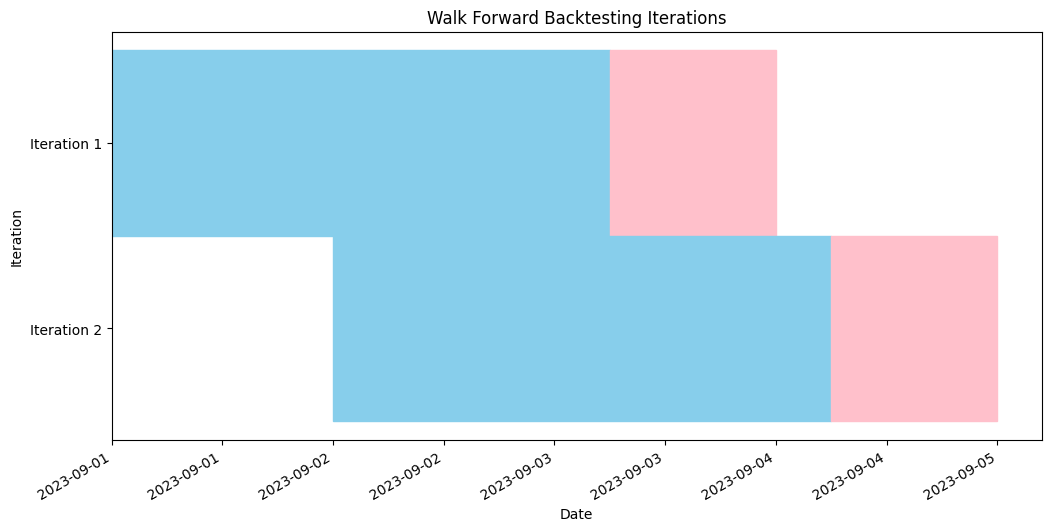

Walk Forward 1
Using parameters:10
Start                     2023-09-01 00:00:00
End                       2023-09-04 00:00:00
Duration                      3 days 00:00:00
Exposure Time [%]                         0.0
Equity Final [$]                      10000.0
Equity Peak [$]                       10000.0
Return [%]                                0.0
Buy & Hold Return [%]                1.122112
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     0.0
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              NaN
Max. Drawdown [%]                        -0.0
Avg. Drawdown [%]                         NaN
Max. Drawdown Duration                    NaN
Avg. Drawdown Duration                    NaN
# Trades                                    0
Win Rate [%]                              NaN
Best Trade [%]                            NaN
Worst Trade [%]                           NaN

In [8]:
bt.runWF(iter=2, strategy_params_limit=strategy_params_limit)

## Results and Conclusion